In [28]:
from pandas import Series
from pandas import Period
Series()

Series([], dtype: float64)

In [29]:
def create_multiplayer_hr_dataframe(players_dataframes):
    return pd.concat(players_dataframes, axis=1).fillna(value=0).resample('D').sum()

def create_multiplayer_hr_total_dataframe(players_dataframes):
    return pd.concat(players_dataframes, axis=1).fillna(method='ffill').fillna(value=0).resample('D').last().fillna(method='ffill')

In [30]:
from __future__ import print_function
from datetime import datetime
import mlbgame
import mlbgame.update

from pandas import DataFrame, Series
import pandas as pd 

#configure the set-up. Not well factored
year = 2017

mlbgame.update.run(start="04-02-2017")

season_start_date = datetime(year, 04, 02)
today_date = datetime.today()


# Crappy way to map the month around
class Month:
    def __init__(self, name, id):
        self.name = name
        self.id = id

months = [Month("April", 4), Month("May", 5), Month("June", 6), Month("July", 7),
Month("August", 8), Month("September", 9), Month("October", 10)]

months_dict = {}
for month in months:
    months_dict[month.id] = month

class Player:
    def __init__(self, first_name, last_name, id):
        self.first_name = first_name
        self.last_name = last_name
        self.id = id
        self.hrs = [0,0,0,0,0,0,0] #One for each month of the game
        self.hr_total = 0
        self.hr_series = Series()
        self.hr_total_series = Series()
        self.add_hrs(0, Period(pd.to_datetime("2017-04-01 00:00"), freq='H'))

    def __str__(self):
        return str.format('{0} : {1}', self.id, self.last_name)

    def __repr__(self):
        return self.__str__()

    def add_hrs(self, count, date):
        
        
        if(self.hr_series.last_valid_index() == date ):
            print('same day', self.hr_series.last_valid_index(), date, self.name(), count, self.hr_series[date] )
            #This data seems to be doubling values right now, need to look into this
            #self.hr_series[date] = count + self.hr_series[date]
        else:
            
            self.hr_total += count
            self.hr_total_series[date] = self.hr_series.fillna(value=0).sum() + count
            self.hr_series[date] = count


    def name(self):
        return self.first_name + " " + self.last_name

    def get_player_hr_dataframe(self):
        return self.hr_series.to_frame(self.name())

    def get_player_hr_total_dataframe(self):
        return self.hr_total_series.to_frame(self.name())

players_dict = {}

#Hand mapped in these players -  ID comes from mlb.com player ID
#No Cannonical naming in a way I could trust to write code to match based upon name.
#This is obviously annoying for the future. Probably can build the data of all players
#in a programatic way in the future (create a CSV and map that in here rather 
#than do it by hand)
players = [Player("Bryce", "Harper", 547180),
Player("Mookie", "Betts", 605141),
Player("Miguel", "Sano", 593934),
Player("Randal", "Grichuk", 545341),
Player("George", "Springer", 543807),
Player("Rougned", "Odor", 596059),
Player("Jonathan", "Schoop", 570731),
Player("Giancarlo", "Stanton", 519317),
#Player("Prince", "Fielder", 425902),
Player("Mark", "Trumbo", 444432),
Player("Carlos", "Correa", 621043),
Player("Miguel", "Cabrera", 408234),
Player("Kyle", "Schwarber", 656941),
Player("Maikel", "Franco", 596748),
Player("Kris", "Bryant", 592178),
Player("Nick", "Castellanos", 592206),
Player("Adam", "Jones", 430945),
Player("Ryan", "Zimmerman", 475582),
Player("Addison", "Russell", 608365),
Player("Trea", "Turner", 607208),
Player("Gregory", "Polanco", 570256),
Player("Eric", "Hosmer", 543333),
Player("Nomar", "Mazara", 608577),
Player("Trevor", "Story", 596115),
Player("Christian", "Yelich",592885),
Player("Aledmys", "Diaz", 649557),
Player("Willson", "Contreras", 575929),
Player("Tommy", "Joseph", 571830),
Player("Ryon", "Healy", 592387),
Player("Jorge", "Soler", 624585),
Player("Mike", "Trout", 545361),
Player("Jose", "Abreu", 547989),
Player("Carlos", "Gomez", 460576),
Player("Gary", "Sanchez", 596142),
Player("Jose", "Bautista", 430832),
Player("Paul", "Goldschmidt", 502671),
Player("Anthony", "Rizzo", 519203),
Player("Joc", "Pederson", 592626),
Player("Buster", "Posey", 457763),
Player("Xander", "Bogaerts", 593428),
Player("Mike", "Zunino", 572287),
Player("Justin", "Bour", 571506), 
Player("Corey", "Dickerson", 572816)
]


for player in players:
    players_dict[player.id] = player



class User:
    def __init__(self, name, playerIds, players_dict):
        self.name = name
        self.playerIds = playerIds
        self.players = []
        for p in self.playerIds:
            self.players.append(players_dict[p])

            
    def players_hr_dataframe(self):
        dataframes = map(lambda p : p.get_player_hr_dataframe(), self.players)
        return create_multiplayer_hr_dataframe(dataframes)

    def players_hr_total_dataframe(self):
        dataframes = map(lambda p : p.get_player_hr_total_dataframe(), self.players)
        return create_multiplayer_hr_total_dataframe(dataframes)


#TODO: Take this mapping and make it read from a text file
#users = [User("Dave", [519317, 425902, 444432, 621043, 408234, 656941, 596748], players_dict),
#User("Craig", [547180, 605141, 593934, 545341, 543807, 596059, 570731], players_dict),
#User("Brian", [519317, 592178, 425902, 593934, 408234, 656941, 592206], players_dict),
#User("Jason", [519317, 430945, 592178, 593934, 475582, 656941, 608365], players_dict)]

users = [User("Dave", [545361, 519317, 547180, 624585, 547989, 593934, 621043], players_dict),
User("Craig", [607208, 608365, 570256, 596115, 547180, 519317, 545361], players_dict),
User("Brian", [545361, 519317, 593934, 547180, 596142, 624585, 430832], players_dict),
User("Jason", [547180, 596059, 545341, 593934, 570256, 457763, 593428], players_dict),
User("Chris", [545361, 596115, 519317, 596748, 547180, 592206, 460576], players_dict),
User("Travis", [624585, 596142, 430832, 502671, 547180, 545361, 519203], players_dict),
User("Franzel", [596115, 519317, 547180, 545361, 596142, 502671, 572287], players_dict),
User("Mike", [547180, 545361, 571830, 596142, 519317, 596115, 592387], players_dict),
User("Gary", [570256, 592626, 608365, 575929, 519203, 593934, 547180], players_dict),
User("Scott", [430832, 571506, 572816, 547180, 592626, 593934, 519317], players_dict)         
]



for m in months:
    month = mlbgame.games(year, m.id)

    for games in month:
        for game in games:
            #Only games in the season (pre-season games will be included without this)
            #Also don't try to pull games that have not been played yet as the record
            #will exist but the call to get the stats will fail
            if game.date > season_start_date: # and game.date < today_date:
                #Try check is here because postponed games will still come through
                #Need to figure out if there is a way to deal with this actively rather than passively
                try:
                    stats = mlbgame.player_stats(game.game_id)
                    game_stats_all = mlbgame.combine_stats(stats)
                    for game_stats in game_stats_all:

                        if hasattr(game_stats, 'hr') and game_stats.id in players_dict:
                            p = players_dict[game_stats.id]
                            p.add_hrs(game_stats.hr, Period(game.date, freq='H'))
                            p.hrs[m.id - 4] += game_stats.hr #-4 to map April to 0 index this is a shitty way to do this

                except ValueError as e:
                    print("Game not found:", game.game_id, e)

# For debugging purposes, print out player totals
for player in players:
   print(player.first_name, player.last_name, player.hrs, player.hr_total_series)


print()

def user_month_total(user, month):
    total = 0
    for p in user.playerIds:
        player = players_dict[p]
        total += player.hrs[month]
    return total

def user_total(user):
    total = 0
    for p in user.playerIds:
        player = players_dict[p]
        total += sum(player.hrs.fillna(value=0))
    return total




Checking local data...
Complete.
Game not found: 2017_04_05_chnmlb_slnmlb_1 Could not find a game with that id.
Game not found: 2017_04_05_detmlb_chamlb_1 Could not find a game with that id.
Game not found: 2017_04_06_pitmlb_bosmlb_1 Could not find a game with that id.
Game not found: 2017_04_19_clemlb_minmlb_1 Could not find a game with that id.
Game not found: 2017_04_25_nyamlb_bosmlb_1 Could not find a game with that id.
Game not found: 2017_04_25_atlmlb_nynmlb_1 Could not find a game with that id.
Game not found: 2017_04_26_tormlb_slnmlb_1 Could not find a game with that id.
Game not found: 2017_04_29_cinmlb_slnmlb_1 Could not find a game with that id.
Game not found: 2017_04_29_minmlb_kcamlb_1 Could not find a game with that id.
Game not found: 2017_05_03_milmlb_slnmlb_1 Could not find a game with that id.
Game not found: 2017_05_04_clemlb_detmlb_1 Could not find a game with that id.
Game not found: 2017_05_07_lanmlb_sdnmlb_1 Could not find a game with that id.
Game not found: 201

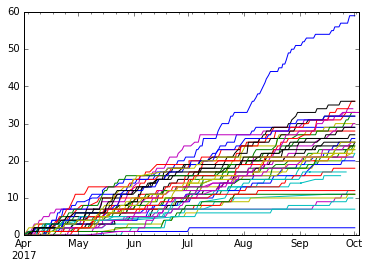

In [31]:
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

for player in players:
    player.hr_total_series.plot()

In [32]:
player_hr_total_dfs = map(lambda p : p.hr_total_series.to_frame(p.name()), players)
player_hr_dfs = map(lambda p : p.get_player_hr_dataframe(), players)

In [33]:
player_hr_total_df = create_multiplayer_hr_total_dataframe(player_hr_total_dfs)
player_hr_total_df

,Bryce Harper,Mookie Betts,Miguel Sano,Randal Grichuk,George Springer,Rougned Odor,Jonathan Schoop,Giancarlo Stanton,Mark Trumbo,Carlos Correa,...,Gary Sanchez,Jose Bautista,Paul Goldschmidt,Anthony Rizzo,Joc Pederson,Buster Posey,Xander Bogaerts,Mike Zunino,Justin Bour,Corey Dickerson
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-03,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-04-04,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-04-05,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-04-06,1.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-04-07,2.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-04-08,2.0,0.0,1.0,1.0,3.0,3.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-04-09,2.0,0.0,2.0,1.0,4.0,3.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
2017-04-10,2.0,0.0,2.0,1.0,4.0,3.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0


In [34]:
player_hr_df = create_multiplayer_hr_dataframe(player_hr_dfs)
player_hr_df

,Bryce Harper,Mookie Betts,Miguel Sano,Randal Grichuk,George Springer,Rougned Odor,Jonathan Schoop,Giancarlo Stanton,Mark Trumbo,Carlos Correa,...,Gary Sanchez,Jose Bautista,Paul Goldschmidt,Anthony Rizzo,Joc Pederson,Buster Posey,Xander Bogaerts,Mike Zunino,Justin Bour,Corey Dickerson
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-03,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-09,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2017-04-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
filled_player_hr_total_df = player_hr_df.fillna(method='ffill').fillna(value=0)
filled_player_hr_total_df

,Bryce Harper,Mookie Betts,Miguel Sano,Randal Grichuk,George Springer,Rougned Odor,Jonathan Schoop,Giancarlo Stanton,Mark Trumbo,Carlos Correa,...,Gary Sanchez,Jose Bautista,Paul Goldschmidt,Anthony Rizzo,Joc Pederson,Buster Posey,Xander Bogaerts,Mike Zunino,Justin Bour,Corey Dickerson
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-03,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-04-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-09,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2017-04-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
filled_player_hr_total_df.tail(5)

,Bryce Harper,Mookie Betts,Miguel Sano,Randal Grichuk,George Springer,Rougned Odor,Jonathan Schoop,Giancarlo Stanton,Mark Trumbo,Carlos Correa,...,Gary Sanchez,Jose Bautista,Paul Goldschmidt,Anthony Rizzo,Joc Pederson,Buster Posey,Xander Bogaerts,Mike Zunino,Justin Bour,Corey Dickerson
2017-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-09-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
player_hr_df.resample('M').sum().transpose().sort_values('2017-04', ascending=False)

,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Ryan Zimmerman,11.0,4.0,4.0,5.0,5.0,7.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
George Springer,7.0,6.0,11.0,3.0,2.0,5.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Anthony Rizzo,6.0,6.0,6.0,6.0,7.0,1.0,0.0
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Corey Dickerson,6.0,6.0,5.0,4.0,4.0,2.0,0.0
Jonathan Schoop,5.0,2.0,8.0,9.0,6.0,2.0,0.0


In [38]:
user_player_hrs = []
for user in users:
    user_player_hrs.append(user.players_hr_dataframe().transpose().sum())

hr_frame = pd.concat(user_player_hrs, axis=1).rename(columns={0:"Dave", 1:"Craig", 2: "Brian", 3:"Jason", 
                                                              4: "Chris", 5: "Travis", 6:"Franzel", 7: "Mike", 8:"Gary", 9:"Scott"})


In [39]:
user_player_hrs_totals = []
for user in users:
    user_player_hrs_totals.append(user.players_hr_total_dataframe().transpose().sum())

user_player_hrs_totals

[2017-04-01      0.0
 2017-04-02      0.0
 2017-04-03      4.0
 2017-04-04      4.0
 2017-04-05      4.0
 2017-04-06      4.0
 2017-04-07      5.0
 2017-04-08      6.0
 2017-04-09      7.0
 2017-04-10      7.0
 2017-04-11      7.0
 2017-04-12     10.0
 2017-04-13     11.0
 2017-04-14     11.0
 2017-04-15     12.0
 2017-04-16     14.0
 2017-04-17     14.0
 2017-04-18     15.0
 2017-04-19     18.0
 2017-04-20     19.0
 2017-04-21     22.0
 2017-04-22     24.0
 2017-04-23     25.0
 2017-04-24     25.0
 2017-04-25     27.0
 2017-04-26     27.0
 2017-04-27     28.0
 2017-04-28     30.0
 2017-04-29     32.0
 2017-04-30     34.0
               ...  
 2017-09-02    184.0
 2017-09-03    185.0
 2017-09-04    186.0
 2017-09-05    186.0
 2017-09-06    186.0
 2017-09-07    187.0
 2017-09-08    187.0
 2017-09-09    189.0
 2017-09-10    192.0
 2017-09-11    192.0
 2017-09-12    192.0
 2017-09-13    192.0
 2017-09-14    192.0
 2017-09-15    192.0
 2017-09-16    192.0
 2017-09-17    194.0
 2017-09-18  

In [40]:
hr_total_frame = pd.concat(user_player_hrs_totals, axis=1).rename(columns={0:"Dave", 1:"Craig", 2: "Brian", 3:"Jason", 
                                                              4: "Chris", 5: "Travis", 6:"Franzel", 7: "Mike", 8:"Gary", 9:"Scott"})
hr_total_frame

,Dave,Craig,Brian,Jason,Chris,Travis,Franzel,Mike,Gary,Scott
2017-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2017-04-03,4.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,4.0,3.0
2017-04-04,4.0,2.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0
2017-04-05,4.0,2.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0
2017-04-06,4.0,2.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
2017-04-07,5.0,3.0,5.0,7.0,5.0,6.0,6.0,6.0,5.0,5.0
2017-04-08,6.0,4.0,6.0,7.0,6.0,7.0,7.0,7.0,5.0,5.0
2017-04-09,7.0,4.0,7.0,9.0,7.0,7.0,7.0,7.0,6.0,7.0
2017-04-10,7.0,4.0,7.0,9.0,7.0,7.0,7.0,7.0,6.0,7.0


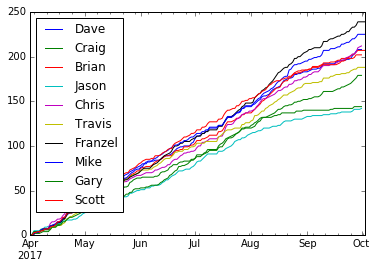

In [41]:
hr_total_frame.plot()

In [42]:
hr_frame.resample('M').sum().transpose()

,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Dave,34.0,43.0,27.0,40.0,39.0,25.0,0.0
Craig,33.0,31.0,21.0,35.0,32.0,27.0,0.0
Brian,32.0,40.0,29.0,36.0,48.0,22.0,0.0
Jason,24.0,26.0,27.0,36.0,19.0,9.0,1.0
Chris,40.0,27.0,27.0,45.0,38.0,34.0,1.0
Travis,28.0,42.0,29.0,27.0,44.0,18.0,0.0
Franzel,34.0,36.0,38.0,40.0,57.0,34.0,0.0
Mike,34.0,40.0,36.0,35.0,50.0,30.0,0.0
Gary,27.0,25.0,32.0,37.0,19.0,4.0,0.0
Scott,35.0,45.0,34.0,39.0,32.0,17.0,0.0


In [43]:
hr_frame.resample('A').sum().transpose()

,2017
Dave,208.0
Craig,179.0
Brian,207.0
Jason,142.0
Chris,212.0
Travis,188.0
Franzel,239.0
Mike,225.0
Gary,144.0
Scott,202.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123668590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12572d1d0>]], dtype=object)

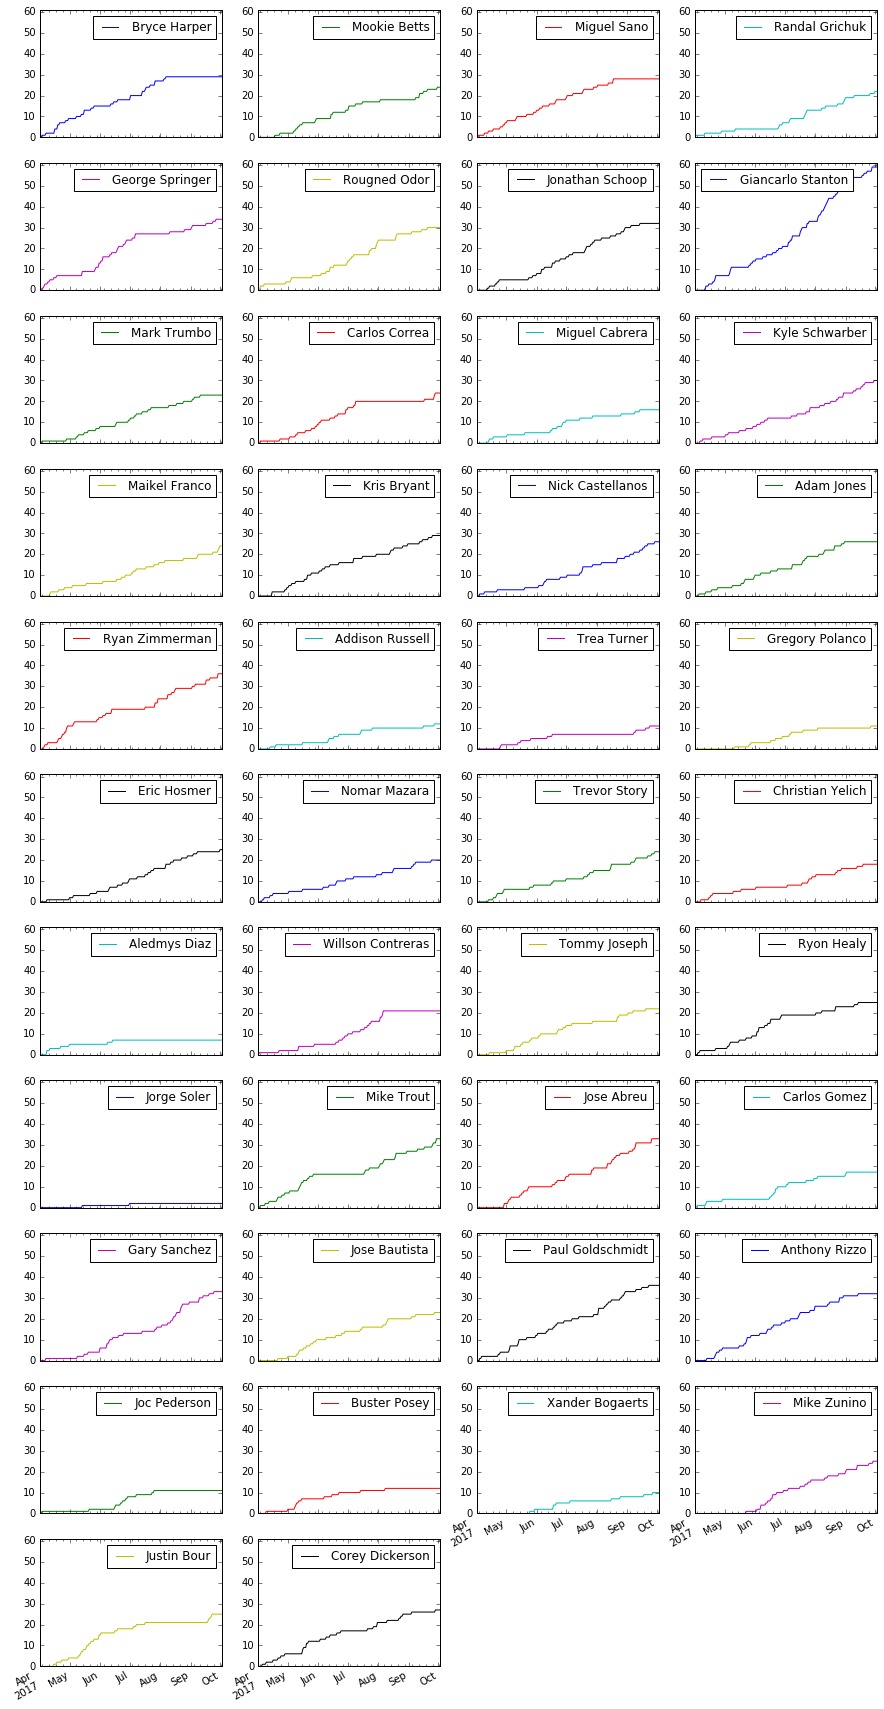

In [44]:
ymax = player_hr_total_df.max().max()

player_hr_total_df.plot(subplots=True, figsize=(15,45), layout=(15, 4), ylim=(0, ymax + 2))


,2017
Dave,208.0
Craig,179.0
Brian,207.0
Jason,142.0
Chris,212.0
Travis,188.0
Franzel,239.0
Mike,225.0
Gary,144.0
Scott,202.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Dave,34.0,43.0,27.0,40.0,39.0,25.0,0.0
Craig,33.0,31.0,21.0,35.0,32.0,27.0,0.0
Brian,32.0,40.0,29.0,36.0,48.0,22.0,0.0
Jason,24.0,26.0,27.0,36.0,19.0,9.0,1.0
Chris,40.0,27.0,27.0,45.0,38.0,34.0,1.0
Travis,28.0,42.0,29.0,27.0,44.0,18.0,0.0
Franzel,34.0,36.0,38.0,40.0,57.0,34.0,0.0
Mike,34.0,40.0,36.0,35.0,50.0,30.0,0.0
Gary,27.0,25.0,32.0,37.0,19.0,4.0,0.0
Scott,35.0,45.0,34.0,39.0,32.0,17.0,0.0


,Dave,Craig,Brian,Jason,Chris,Travis,Franzel,Mike,Gary,Scott
2017-09-29,208.0,179.0,207.0,141.0,210.0,188.0,239.0,225.0,144.0,202.0
2017-09-30,208.0,179.0,207.0,141.0,211.0,188.0,239.0,225.0,144.0,202.0
2017-10-01,208.0,179.0,207.0,142.0,212.0,188.0,239.0,225.0,144.0,202.0
2017-10-02,NaN,NaN,207.0,NaN,NaN,188.0,239.0,225.0,NaN,NaN
2017-10-03,NaN,NaN,207.0,NaN,NaN,188.0,239.0,225.0,NaN,NaN


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Jorge Soler,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Jose Abreu,2.0,8.0,4.0,5.0,7.0,7.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
Carlos Correa,2.0,7.0,7.0,4.0,0.0,4.0,0.0
Total,34.0,43.0,27.0,40.0,39.0,25.0,0.0


,2017
Mike Trout,33.0
Giancarlo Stanton,59.0
Bryce Harper,29.0
Jorge Soler,2.0
Jose Abreu,33.0
Miguel Sano,28.0
Carlos Correa,24.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Trea Turner,2.0,3.0,2.0,0.0,0.0,4.0,0.0
Addison Russell,2.0,1.0,4.0,3.0,0.0,2.0,0.0
Gregory Polanco,0.0,3.0,3.0,3.0,1.0,1.0,0.0
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Total,33.0,31.0,21.0,35.0,32.0,27.0,0.0


,2017
Trea Turner,11.0
Addison Russell,12.0
Gregory Polanco,11.0
Trevor Story,24.0
Bryce Harper,29.0
Giancarlo Stanton,59.0
Mike Trout,33.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Gary Sanchez,1.0,3.0,9.0,3.0,12.0,5.0,0.0
Jorge Soler,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Jose Bautista,1.0,9.0,4.0,2.0,4.0,3.0,0.0
Total,32.0,40.0,29.0,36.0,48.0,22.0,0.0


,2017
Mike Trout,33.0
Giancarlo Stanton,59.0
Miguel Sano,28.0
Bryce Harper,29.0
Gary Sanchez,33.0
Jorge Soler,2.0
Jose Bautista,23.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Rougned Odor,4.0,3.0,6.0,10.0,4.0,3.0,0.0
Randal Grichuk,3.0,1.0,3.0,6.0,5.0,3.0,1.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
Gregory Polanco,0.0,3.0,3.0,3.0,1.0,1.0,0.0
Buster Posey,1.0,6.0,3.0,1.0,1.0,0.0,0.0
Xander Bogaerts,0.0,2.0,3.0,1.0,2.0,2.0,0.0
Total,24.0,26.0,27.0,36.0,19.0,9.0,1.0


,2017
Bryce Harper,29.0
Rougned Odor,30.0
Randal Grichuk,22.0
Miguel Sano,28.0
Gregory Polanco,11.0
Buster Posey,12.0
Xander Bogaerts,10.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Maikel Franco,4.0,2.0,4.0,6.0,2.0,5.0,1.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Nick Castellanos,3.0,1.0,5.0,6.0,4.0,7.0,0.0
Carlos Gomez,4.0,0.0,6.0,4.0,1.0,2.0,0.0
Total,40.0,27.0,27.0,45.0,38.0,34.0,1.0


,2017
Mike Trout,33.0
Trevor Story,24.0
Giancarlo Stanton,59.0
Maikel Franco,24.0
Bryce Harper,29.0
Nick Castellanos,26.0
Carlos Gomez,17.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Jorge Soler,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Gary Sanchez,1.0,3.0,9.0,3.0,12.0,5.0,0.0
Jose Bautista,1.0,9.0,4.0,2.0,4.0,3.0,0.0
Paul Goldschmidt,4.0,8.0,7.0,3.0,11.0,3.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Anthony Rizzo,6.0,6.0,6.0,6.0,7.0,1.0,0.0
Total,28.0,42.0,29.0,27.0,44.0,18.0,0.0


,2017
Jorge Soler,2.0
Gary Sanchez,33.0
Jose Bautista,23.0
Paul Goldschmidt,36.0
Bryce Harper,29.0
Mike Trout,33.0
Anthony Rizzo,32.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Gary Sanchez,1.0,3.0,9.0,3.0,12.0,5.0,0.0
Paul Goldschmidt,4.0,8.0,7.0,3.0,11.0,3.0,0.0
Mike Zunino,0.0,1.0,10.0,5.0,3.0,6.0,0.0
Total,34.0,36.0,38.0,40.0,57.0,34.0,0.0


,2017
Trevor Story,24.0
Giancarlo Stanton,59.0
Bryce Harper,29.0
Mike Trout,33.0
Gary Sanchez,33.0
Paul Goldschmidt,36.0
Mike Zunino,25.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Tommy Joseph,1.0,7.0,5.0,3.0,3.0,3.0,0.0
Gary Sanchez,1.0,3.0,9.0,3.0,12.0,5.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Ryon Healy,3.0,6.0,10.0,0.0,4.0,2.0,0.0
Total,34.0,40.0,36.0,35.0,50.0,30.0,0.0


,2017
Bryce Harper,29.0
Mike Trout,33.0
Tommy Joseph,22.0
Gary Sanchez,33.0
Giancarlo Stanton,59.0
Trevor Story,24.0
Ryon Healy,25.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Gregory Polanco,0.0,3.0,3.0,3.0,1.0,1.0,0.0
Joc Pederson,1.0,1.0,6.0,3.0,0.0,0.0,0.0
Addison Russell,2.0,1.0,4.0,3.0,0.0,2.0,0.0
Willson Contreras,2.0,3.0,4.0,7.0,5.0,0.0,0.0
Anthony Rizzo,6.0,6.0,6.0,6.0,7.0,1.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Total,27.0,25.0,32.0,37.0,19.0,4.0,0.0


,2017
Gregory Polanco,11.0
Joc Pederson,11.0
Addison Russell,12.0
Willson Contreras,21.0
Anthony Rizzo,32.0
Miguel Sano,28.0
Bryce Harper,29.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Jose Bautista,1.0,9.0,4.0,2.0,4.0,3.0,0.0
Justin Bour,4.0,11.0,3.0,3.0,0.0,4.0,0.0
Corey Dickerson,6.0,6.0,5.0,4.0,4.0,2.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Joc Pederson,1.0,1.0,6.0,3.0,0.0,0.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Total,35.0,45.0,34.0,39.0,32.0,17.0,0.0


,2017
Jose Bautista,23.0
Justin Bour,25.0
Corey Dickerson,27.0
Bryce Harper,29.0
Joc Pederson,11.0
Miguel Sano,28.0
Giancarlo Stanton,59.0


,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
Ryan Zimmerman,11.0,4.0,4.0,5.0,5.0,7.0,0.0
Bryce Harper,9.0,6.0,3.0,9.0,2.0,0.0,0.0
Miguel Sano,7.0,5.0,6.0,6.0,4.0,0.0,0.0
George Springer,7.0,6.0,11.0,3.0,2.0,5.0,0.0
Mike Trout,7.0,9.0,0.0,3.0,8.0,6.0,0.0
Giancarlo Stanton,7.0,7.0,7.0,12.0,18.0,8.0,0.0
Anthony Rizzo,6.0,6.0,6.0,6.0,7.0,1.0,0.0
Trevor Story,6.0,2.0,2.0,5.0,3.0,6.0,0.0
Corey Dickerson,6.0,6.0,5.0,4.0,4.0,2.0,0.0
Jonathan Schoop,5.0,2.0,8.0,9.0,6.0,2.0,0.0


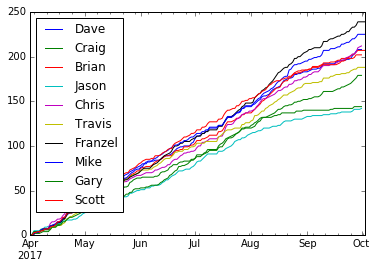

In [45]:
from IPython.display import display, HTML
display(hr_frame.resample('A').sum().transpose())
display(hr_frame.resample('M').sum().transpose())
hr_total_frame.plot()
display(hr_total_frame.tail(5))
for user in users:
    display(HTML("<h2>" + user.name + "</h2>"))
    user_player_frame = user.players_hr_dataframe().resample('M').sum()
    user_player_frame['Total'] = user_player_frame.sum(axis=1)
    display(user_player_frame.transpose())
    display(user.players_hr_dataframe().resample('A').sum().transpose())

display(player_hr_df.resample('M').sum().transpose().sort_values('2017-04', ascending=False))
